In [13]:
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
import mflow

In [3]:
import sys, os
print("CWD:: ",os.getcwd())
sys.path

CWD::  /mnt/externz/zRepoz/003_school/01_ocular/notebooks


['/mnt/externz/zRepoz/003_school/01_ocular/code/mflow',
 '/mnt/externz/zRepoz/003_school/01_ocular/code/mflow',
 '/mnt/externz/zRepoz/003_school/01_ocular/notebooks',
 '/home/bilha/anaconda3/lib/python37.zip',
 '/home/bilha/anaconda3/lib/python3.7',
 '/home/bilha/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/home/bilha/anaconda3/lib/python3.7/site-packages',
 '/home/bilha/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/home/bilha/.ipython']

In [4]:
from zdata import RemappedFundusImage, ZMultiModalRecord, ZModal
from zdata import PdDataStats, ZPdDataset
import utilz

(['tester', (224, 224, 3), 0.0, 1.0, 0.343],
 ['label', 'size', 'min', 'max', 'mean'])

(-0.5, 223.5, 223.5, -0.5)

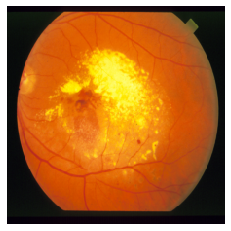

In [5]:
fpath = "im0064.ppm"
img = RemappedFundusImage('tester', fpath)
img.stats

plt.imshow( img.data)
plt.axis('off')

(224, 224, 4)

(-0.5, 223.5, 223.5, -0.5)

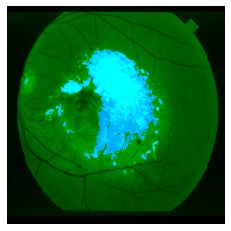

In [6]:
fimg = img.remapped_data
fimg.shape

plt.imshow( fimg[:,:,0:3], cmap='gray')
plt.axis('off')

In [7]:
multimod = ZMultiModalRecord([img, ZModal('desc', 'The quick brown fox jumped over the lazy dogs')])
_ = [ print(f"{r.label}: {r.stats}") for r in multimod] 

tester: (['tester', (224, 224, 3), 0.0, 1.0, 0.343], ['label', 'size', 'min', 'max', 'mean'])
desc: (['desc', 45, ' ', 'z', 'N/A'], ['label', 'size', 'min', 'max', 'mean'])


In [8]:
pa = [[1,2,3,4],[10, 20, 30, 40]]
pah = ['a', 'b', 'c', 'd']
pdstats = PdDataStats(
                {PdDataStats.DATA_DICT_RECORDZ_KEY:pa,
                PdDataStats.DATA_DICT_HEADERZ_KEY:pah,                    
                },
                 ftype=PdDataStats.TYPE_IN_MEM_ARRAY ) 

pdstats.dframe 

,a,b,c,d
0,1,2,3,4
1,10,20,30,40


In [9]:

pdstats = PdDataStats(
                {PdDataStats.DATA_DICT_RECORDZ_KEY:'/mnt/externz/zRepoz/003_school/01_ocular/notebooks/disease_codes.txt',
                PdDataStats.DATA_DICT_HEADERZ_KEY:['DCODE', 'DFullName', 'DShortCode'],
                'rec_parser': utilz.FileIO.row_parser                     
                },
                 ftype=PdDataStats.TYPE_TXT_LINES_FILE ) 

pdstats.dframe 

,DCODE,DFullName,DShortCode
0,0,Normal/Healthy,Normal
1,1,Hollenhorst Emboli,Emboli
2,2,Branch Retinal Artery Occlusion,BRAO
3,3,Cilio-Retinal Artery Occlusion,CRAO
4,4,Branch Retinal Vein Occlusion,BRVO
5,5,Central Retinal Vein Occlusion,CRVO
6,6,Hemi-Central Retinal Vein Occlusion,Hemi-CRVO
7,7,Background Diabetic Retinopathy,BDR-NPDR
8,8,Proliferative Diabetic Retinopathy,PDR
9,9,Arteriosclerotic Retinopathy,ASR


In [10]:
pdstats = ZPdDataset(
                {PdDataStats.DATA_DICT_RECORDZ_KEY:'/mnt/externz/zRepoz/datasets/fundus/stare',
                'fname_parser': utilz.FileIO.row_parser,
                'additional_info_func':utilz.FileIO.image_file_parser  ,
                 'ext':'*.ppm'
                },
                 ftype=PdDataStats.TYPE_DIR ) 

pdstats.dframe 

,col_0,col_1,col_2,col_3,col_4,col_5
0,im0001,"(605, 700, 3)",0,255,72.884917,67.462580
1,im0002,"(605, 700, 3)",0,255,72.075194,71.322069
2,im0003,"(605, 700, 3)",0,255,88.611887,83.227167
3,im0004,"(605, 700, 3)",0,255,77.254344,73.245229
4,im0005,"(605, 700, 3)",0,255,102.024678,69.818867
...,...,...,...,...,...,...
392,im0398,"(605, 700, 3)",0,255,101.026900,84.525559
393,im0399,"(605, 700, 3)",0,255,115.219929,80.852465
394,im0400,"(605, 700, 3)",0,255,118.006856,77.135192
395,im0401,"(605, 700, 3)",0,255,95.073858,92.740189


In [11]:
pdstats.summarize()

,col_0,col_1,col_2,col_3,col_4,col_5
count,397,397,397.000000,397.000000,397.000000,397.000000
unique,397,1,NaN,NaN,NaN,NaN
top,im0221,"(605, 700, 3)",NaN,NaN,NaN,NaN
freq,1,397,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.065491,253.967254,83.071825,73.856816
std,NaN,NaN,0.247703,6.358915,15.154158,13.368342
min,NaN,NaN,0.000000,179.000000,49.365399,31.962128
25%,NaN,NaN,0.000000,255.000000,72.793943,66.022203
50%,NaN,NaN,0.000000,255.000000,81.432149,76.270379
75%,NaN,NaN,0.000000,255.000000,92.292583,83.227167


In [12]:
pdstats.train_test_validate_split()
pdstats.test_set.describe()

Done splitting 0.3% test with shuffle = True


,col_2,col_3,col_4,col_5
count,120.000000,120.000000,120.000000,120.000000
mean,0.050000,253.508333,82.391280,73.219669
std,0.218859,8.489238,13.819754,14.299849
min,0.000000,179.000000,51.908746,35.210466
25%,0.000000,255.000000,72.403858,65.567152
50%,0.000000,255.000000,81.380129,74.575570
75%,0.000000,255.000000,92.312158,83.580621
max,1.000000,255.000000,118.218080,98.670668


In [19]:
fp1 = '/mnt/externz/zRepoz/datasets/fundus/stare/im0064.ppm'
fp2 = '/mnt/externz/zRepoz/datasets/fundus/stare/im0264.ppm'
df = pd.DataFrame.from_records([[fp1, 'The quick brown fox jumped over the lazy dogs'],
                                 [fp2, "yet another image here"]
                                ],columns=['fpath', 'extra'])
df

,fpath,extra
0,/mnt/externz/zRepoz/datasets/fundus/stare/im00...,The quick brown fox jumped over the lazy dogs
1,/mnt/externz/zRepoz/datasets/fundus/stare/im02...,yet another image here
